In [2]:
%matplotlib notebook
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Jupyter Specifics
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed
display(HTML("<style>.container { width:100% !important; }</style>"))
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

import pickle as pk
from time import time

/Users/n/.pyenv/versions/3.7.2/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# read in data
start=time()
print('reading in data...')
with open('data_all.pk','rb') as fp:
    foo = pk.load(fp)
print('elapsed: ',time()-start)

for x in foo:
    stmp = x+"= foo['"+x+"']"
    exec(stmp)

reading in data...
elapsed:  10.337789297103882


In [4]:
[x for x in foo]

['bcountries',
 'bcountries_1',
 'c_countries',
 'countries',
 'countries_common',
 'countries_common_x',
 'countries_jhu',
 'countries_jhu_2_owid',
 'countries_jhu_4_owid',
 'countries_jhu_non_special',
 'countries_jhu_overseas',
 'countries_owid',
 'countries_owid_to_jhu',
 'country',
 'countrynms',
 'countrysets',
 'd_countries',
 'dcountries',
 'jhu_to_owid_str_country',
 'lc_countries',
 'lcountries',
 'nc_countries',
 'owid_to_jhu_str_country',
 'pc_countries',
 'scountries',
 'swcountries',
 'covid_owid',
 'covid_owid_ts',
 'covid_ts',
 'clusdata_all',
 'cases',
 'datasets',
 'deaths',
 'deaths_owid',
 'deaths_raw',
 'mindeaths',
 'mindeathspm',
 'new_deaths_c_spm_jhu',
 'new_deaths_c_spm_owid',
 'new_deaths_pm_jhu',
 'new_deaths_pm_owid',
 'new_deaths_spm',
 'new_deaths_spm_jhu',
 'new_deaths_spm_owid',
 'short_deaths',
 'short_deaths_c',
 'short_deaths_est',
 'total_deaths',
 'total_deaths_cs_jhu',
 'total_deaths_cs_owid',
 'total_deaths_jhu',
 'total_deaths_owid',
 'total_dea

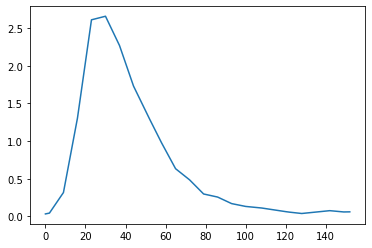

In [10]:
plt.plot(clusdata_all['deaths']['Germany']);

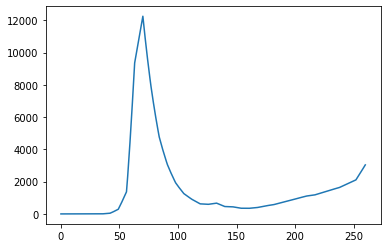

In [6]:
plt.plot(new_cases_c_nonlinr_owid['Germany']);

# Consensus basics

In [49]:
# from Consensus import *
# NB:  scoping problem seems to prevent import from working properly.
# instead use exec below.

In [37]:
exec(open('Consensus.py','r').read())

In [38]:
#foo = Consensus(cases=['deaths','cases','cases_nonlinr'])
foo = Consensus()

In [39]:
cases

['deaths',
 'cases',
 'cases_lin2020',
 'cases_pwlfit',
 'cases_nonlin',
 'cases_nonlinr']

In [40]:
foo.scan(diag=True) # diag=False for no output except progress bar


-------------------------- deaths -------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   66 clustered;   6 unclustered;  validity = 0.39991 validitysc = 0.39991 score1: 4.201 score2: 3.751
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   66 clustered;   6 unclustered;  validity = 0.39991 validitysc = 0.39991 score1: 4.201 score2: 3.751
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   10 unclustered;  validity = 0.40804 validitysc = 0.40804 score1: 4.451 score2: 4.901
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   57 clustered;   15 unclustered;  validity = 0.38807 validitysc = 0.38807 score1: 6.077 score2: 9.663
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   57 clustered;   15 unclustered;  validity = 0.38807 validitysc = 0.38807 score1: 6.077 score2: 9.663
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   57 clustered;   15 unclustered;  validity = 0.3

--------------------------
hdbscan:  3 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   70 clustered;   2 unclustered;  validity = 0.25965 validitysc = 0.46758 score1: 3.539 score2: 1.283
hdbscan:  4 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   70 clustered;   2 unclustered;  validity = 0.25965 validitysc = 0.46758 score1: 3.539 score2: 1.283
hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   70 clustered;   2 unclustered;  validity = 0.25965 validitysc = 0.46758 score1: 3.539 score2: 1.283
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   70 clustered;   2 unclustered;  validity = 0.25965 validitysc = 0.46758 score1: 3.539 score2: 1.283
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   70 clustered;   2 unclustered;  validity = 0.25965 validitysc = 0.46758 score1: 3.539 score2: 1.283
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   70 clustered;   2 unclustered;  validity = 0.25965 validitysc = 0.46758 score1: 3.539 sco

hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   65 clustered;   7 unclustered;  validity = 0.51252 validitysc = 0.51252 score1: 3.351 score2: 2.732
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   65 clustered;   7 unclustered;  validity = 0.51252 validitysc = 0.51252 score1: 3.351 score2: 2.732
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   65 clustered;   7 unclustered;  validity = 0.51252 validitysc = 0.51252 score1: 3.351 score2: 2.732
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   65 clustered;   7 unclustered;  validity = 0.51252 validitysc = 0.51252 score1: 3.351 score2: 2.732
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   65 clustered;   7 unclustered;  validity = 0.51252 validitysc = 0.51252 score1: 3.351 score2: 2.732
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   52 clustered;   20 unclustered;  validity = 0.3597 validitysc = 0.44119 score1: 8.767 sco

hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   65 clustered;   7 unclustered;  validity = 0.14639 validitysc = 0.30042 score1: 5.729 score2: 6.99
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   6 clusters;   55 clustered;   17 unclustered;  validity = 0.28441 validitysc = 0.50911 score1: 6.364 score2: 10.018
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   52 clustered;   20 unclustered;  validity = 0.26777 validitysc = 0.48829 score1: 6.548 score2: 10.24
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   52 clustered;   20 unclustered;  validity = 0.26777 validitysc = 0.48829 score1: 6.548 score2: 10.24
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   52 clustered;   20 unclustered;  validity = 0.26777 validitysc = 0.48829 score1: 6.548 score2: 10.24
hdbscan:  7 minc:   2 mins:   10 FPCAcomponents:   3 clusters;   64 clustered;   8 unclustered;  validity = 0.13115 validitysc = 0.28258 score1: 

hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   55 clustered;   17 unclustered;  validity = 0.0393 validitysc = 0.0393 score1: 29.346 score2: 108.144
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   55 clustered;   17 unclustered;  validity = 0.0393 validitysc = 0.0393 score1: 29.346 score2: 108.144
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   55 clustered;   17 unclustered;  validity = 0.0393 validitysc = 0.0393 score1: 29.346 score2: 108.144
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   54 clustered;   18 unclustered;  validity = 0.32564 validitysc = 0.40429 score1: 8.573 score2: 20.035
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   64 clustered;   8 unclustered;  validity = 0.2438 validitysc = 0.31183 score1: 5.307 score2: 6.414
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   3 clusters;   69 clustered;   3 unclustered;  validity = 0.001 validitysc = 0.0014 score1: 712.8

hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   59 clustered;   13 unclustered;  validity = 0.19682 validitysc = 0.39004 score1: 5.664 score2: 8.332
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   61 clustered;   11 unclustered;  validity = 0.25129 validitysc = 0.46689 score1: 4.342 score2: 4.712
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   61 clustered;   11 unclustered;  validity = 0.25129 validitysc = 0.46689 score1: 4.342 score2: 4.712
hdbscan:  7 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   61 clustered;   11 unclustered;  validity = 0.25129 validitysc = 0.46689 score1: 4.342 score2: 4.712
hdbscan:  8 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   61 clustered;   11 unclustered;  validity = 0.25129 validitysc = 0.46689 score1: 4.342 score2: 4.712
hdbscan:  9 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   61 clustered;   11 unclustered;  validity = 0.25129 validitysc = 0.46689 score1: 4.342 score2: 4.712
----

hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   48 clustered;   24 unclustered;  validity = 0.1555 validitysc = 0.1555 score1: 11.231 score2: 30.868
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   53 clustered;   19 unclustered;  validity = 0.20166 validitysc = 0.20166 score1: 9.259 score2: 23.555
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   54 clustered;   18 unclustered;  validity = 0.40648 validitysc = 0.49046 score1: 8.139 score2: 16.515
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   54 clustered;   18 unclustered;  validity = 0.40648 validitysc = 0.49046 score1: 8.139 score2: 16.515
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   58 clustered;   14 unclustered;  validity = 0.2699 validitysc = 0.34191 score1: 6.225 score2: 10.236
hdbscan:  6 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   53 clustered;   19 unclustered;  validity = 0.30389 validitysc = 0.38025 score1: 

hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   7 clusters;   54 clustered;   18 unclustered;  validity = 0.36002 validitysc = 0.5948 score1: 6.781 score2: 10.592
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   6 clusters;   50 clustered;   22 unclustered;  validity = 0.32511 validitysc = 0.55694 score1: 7.196 score2: 11.851
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   59 clustered;   13 unclustered;  validity = 0.29425 validitysc = 0.52106 score1: 4.519 score2: 4.99
hdbscan:  7 minc:   2 mins:   10 FPCAcomponents:   3 clusters;   63 clustered;   9 unclustered;  validity = 0.24383 validitysc = 0.45695 score1: 4.488 score2: 4.924
hdbscan:  8 minc:   2 mins:   10 FPCAcomponents:   3 clusters;   63 clustered;   9 unclustered;  validity = 0.24383 validitysc = 0.45695 score1: 4.488 score2: 4.924
hdbscan:  9 minc:   2 mins:   10 FPCAcomponents:   3 clusters;   63 clustered;   9 unclustered;  validity = 0.24383 validitysc = 0.45695 score1: 4.488 score2: 4.924
-------

hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   66 clustered;   6 unclustered;  validity = 0.25456 validitysc = 0.25456 score1: 5.128 score2: 4.714
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   66 clustered;   6 unclustered;  validity = 0.25456 validitysc = 0.25456 score1: 5.128 score2: 4.714
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   70 clustered;   2 unclustered;  validity = 0.08275 validitysc = 0.08275 score1: 12.985 score2: 6.043
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   51 clustered;   21 unclustered;  validity = 0.32838 validitysc = 0.4073 score1: 9.155 score2: 23.202
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   6 clusters;   51 clustered;   21 unclustered;  validity = 0.34823 validitysc = 0.42887 score1: 7.532 score2: 14.69
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   58 clustered;   14 unclustered;  validity = 0.20422 validitysc = 0.26507 score1: 6.573

hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   68 clustered;   4 unclustered;  validity = 0.09848 validitysc = 0.21478 score1: 6.456 score2: 5.587
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   68 clustered;   4 unclustered;  validity = 0.09848 validitysc = 0.21478 score1: 6.456 score2: 5.587
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   6 clusters;   64 clustered;   8 unclustered;  validity = 0.33283 validitysc = 0.56555 score1: 4.368 score2: 4.244
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   61 clustered;   11 unclustered;  validity = 0.24032 validitysc = 0.4522 score1: 4.411 score2: 4.865
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   61 clustered;   11 unclustered;  validity = 0.24032 validitysc = 0.4522 score1: 4.411 score2: 4.865
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   61 clustered;   11 unclustered;  validity = 0.24032 validitysc = 0.4522 score1: 4.411

hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   69 clustered;   3 unclustered;  validity = 0.22905 validitysc = 0.22905 score1: 5.466 score2: 3.274
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   7 clusters;   53 clustered;   19 unclustered;  validity = 0.36114 validitysc = 0.44274 score1: 7.559 score2: 15.02
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   58 clustered;   14 unclustered;  validity = 0.41565 validitysc = 0.49993 score1: 4.8 score2: 5.601
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   58 clustered;   14 unclustered;  validity = 0.41565 validitysc = 0.49993 score1: 4.8 score2: 5.601
hdbscan:  6 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   58 clustered;   14 unclustered;  validity = 0.41565 validitysc = 0.49993 score1: 4.8 score2: 5.601
hdbscan:  7 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   58 clustered;   14 unclustered;  validity = 0.41565 validitysc = 0.49993 score1: 4.8 score2

hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   59 clustered;   13 unclustered;  validity = 0.30151 validitysc = 0.52971 score1: 4.988 score2: 6.135
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   59 clustered;   13 unclustered;  validity = 0.30151 validitysc = 0.52971 score1: 4.988 score2: 6.135
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   59 clustered;   13 unclustered;  validity = 0.30151 validitysc = 0.52971 score1: 4.988 score2: 6.135
hdbscan:  7 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   59 clustered;   13 unclustered;  validity = 0.30151 validitysc = 0.52971 score1: 4.988 score2: 6.135
hdbscan:  8 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   59 clustered;   13 unclustered;  validity = 0.30151 validitysc = 0.52971 score1: 4.988 score2: 6.135
hdbscan:  9 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   59 clustered;   13 unclustered;  validity = 0.30151 validitysc = 0.52971 score1: 4.988 score2: 6.135
----

In [135]:
len(foo.report)

24

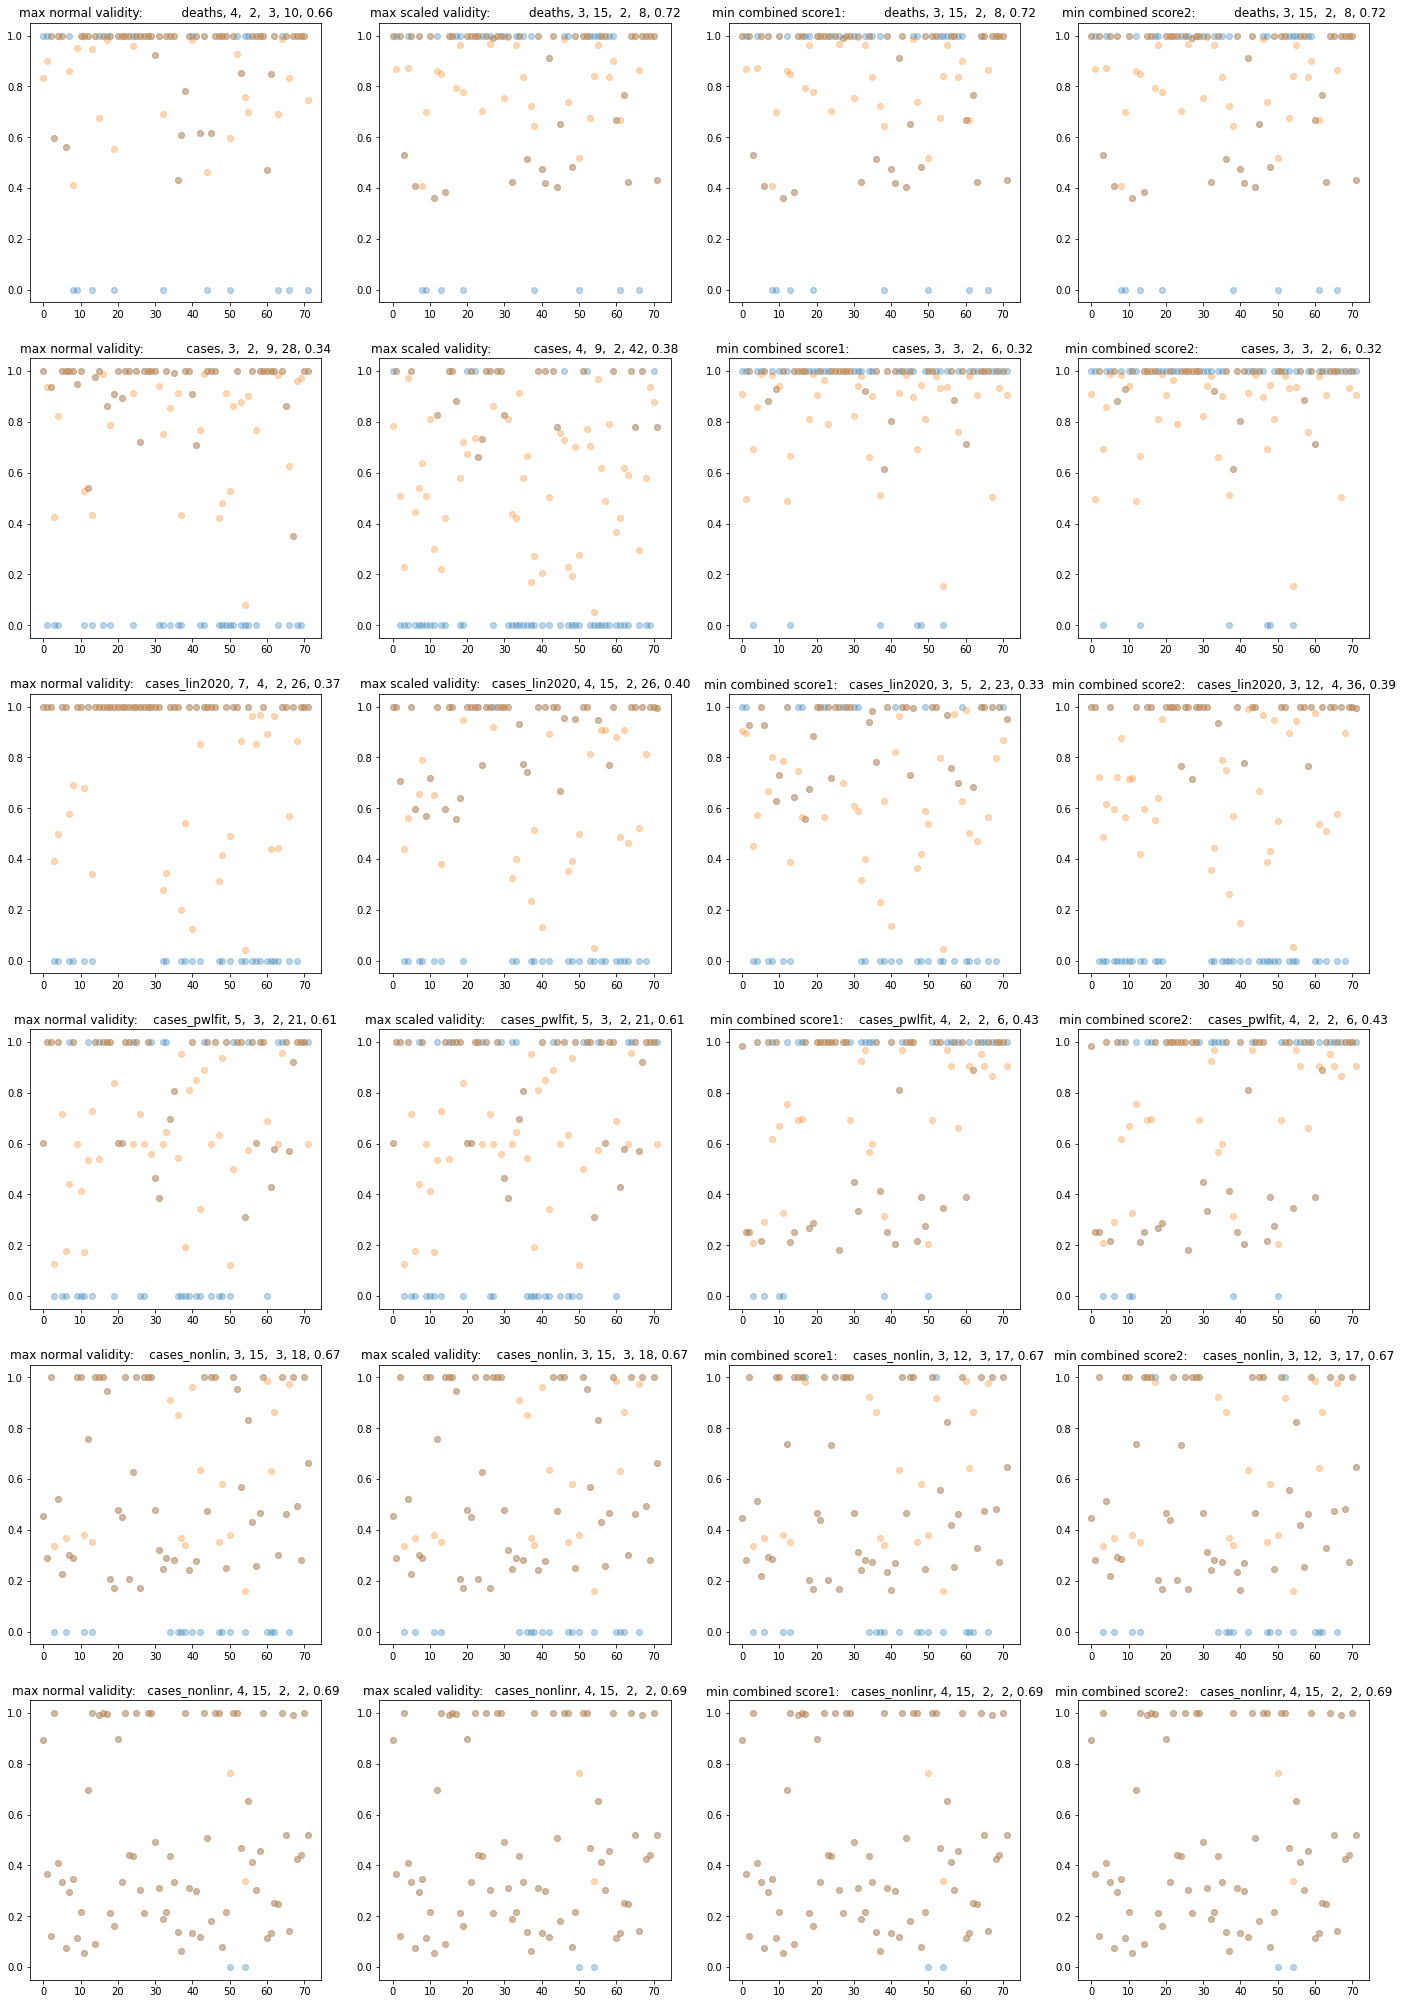

In [136]:
foo.plot_outliers()

**Must do this to graph any of the clustrings...**

In [41]:
foo.make_clusters()


currently only 11 colours allowed 13
(24, 72)
(72, 24, 3)
(24, 72, 3)


/Users/n/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel/__main__.py:187: RuntimeWarning: invalid value encountered in double_scalars
/Users/n/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel/__main__.py:188: RuntimeWarning: invalid value encountered in double_scalars


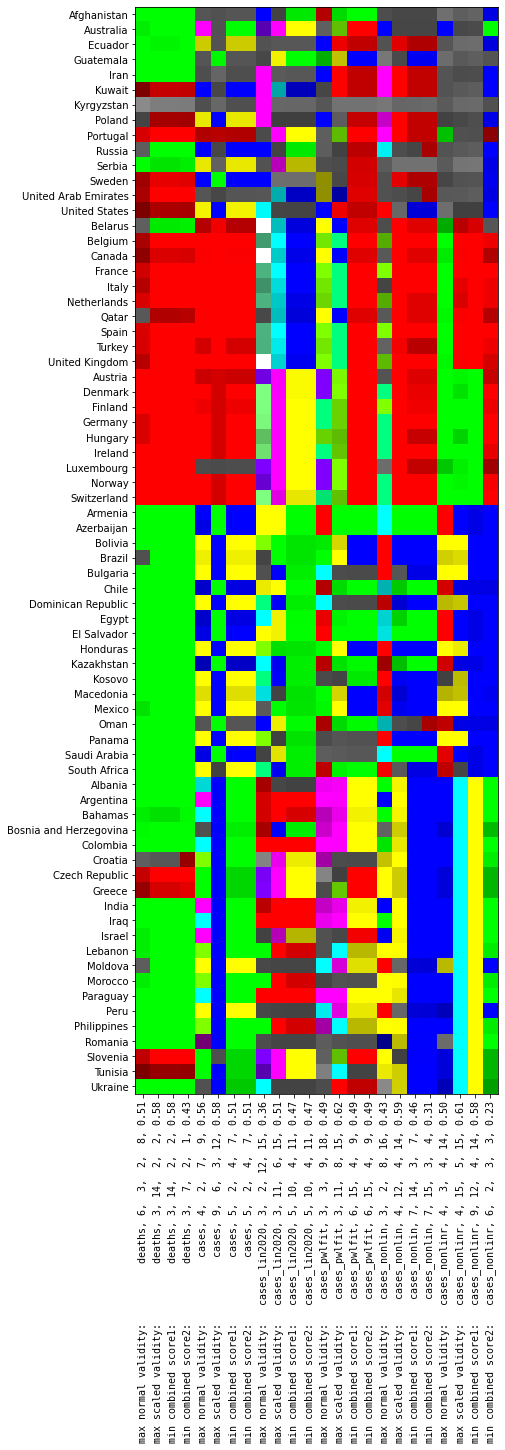

In [42]:
foo.plot_stage(1)

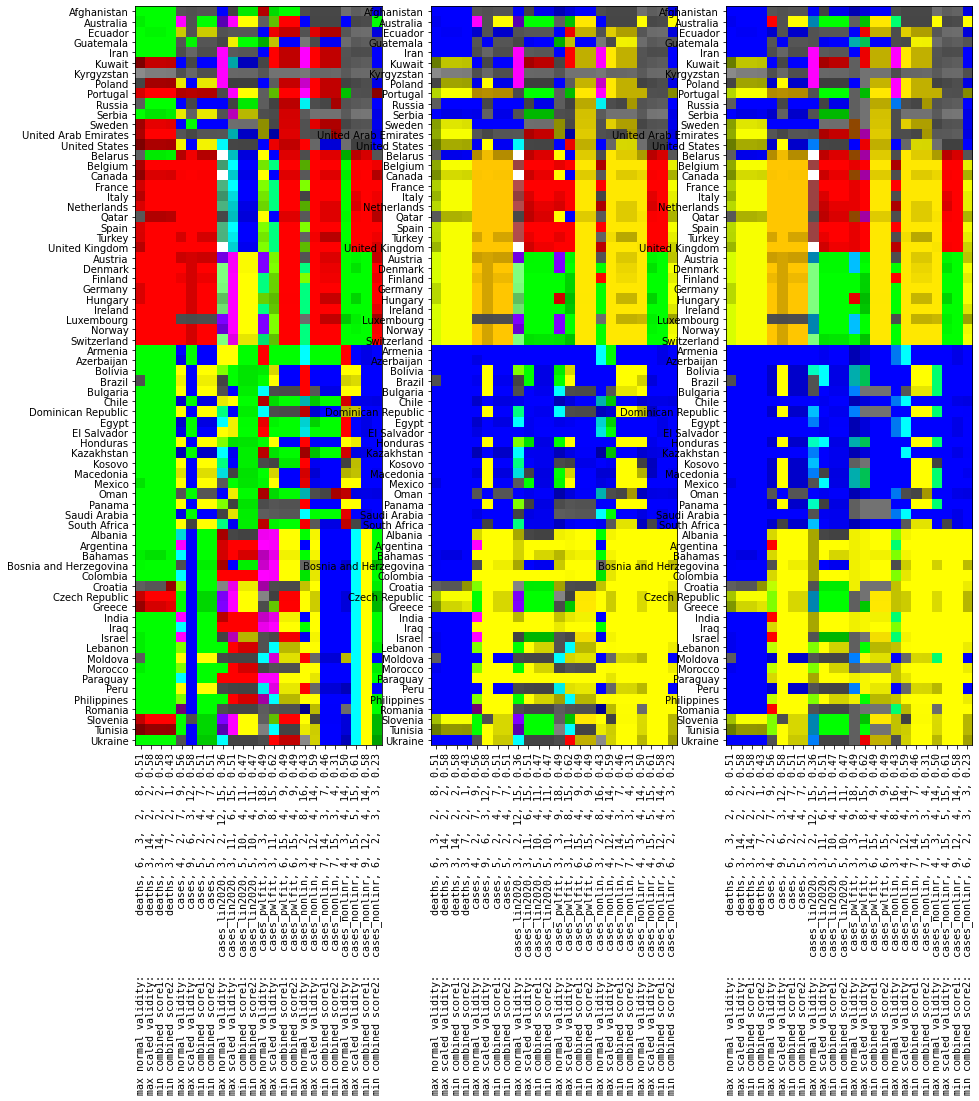

In [43]:
foo.plot_all_stages()

In [44]:
foo.swizzle()

In [45]:
print(foo.classes)

[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, -1, -1]


**Check to see classes are same as old swizzle2:**

In [48]:
fooo = swizzle2(scountries,foo.coldata_adj2,foo.cols,foo.refclustering)

-------class 0 ---------
0 4 Iran
1 5 Kuwait
2 7 Poland
3 14 Belarus
-------class 1 ---------
4 8 Portugal
5 11 Sweden
6 12 United Arab Emirates
7 13 United States
8 15 Belgium
9 16 Canada
10 17 France
11 18 Italy
12 19 Netherlands
13 20 Qatar
14 21 Spain
15 22 Turkey
16 23 United Kingdom
17 24 Austria
18 25 Denmark
19 26 Finland
20 27 Germany
21 28 Hungary
22 29 Ireland
23 30 Luxembourg
24 31 Norway
25 32 Switzerland
26 51 Albania
27 52 Argentina
28 53 Bahamas
29 54 Bosnia and Herzegovina
30 55 Colombia
31 56 Croatia
32 57 Czech Republic
33 58 Greece
34 59 India
35 60 Iraq
36 61 Israel
37 62 Lebanon
38 64 Morocco
39 65 Paraguay
40 67 Philippines
41 68 Romania
42 69 Slovenia
43 70 Tunisia
44 71 Ukraine
-------class 2 ---------
45 1 Australia
46 63 Moldova
-------class 3 ---------
47 2 Ecuador
48 3 Guatemala
49 9 Russia
50 10 Serbia
51 33 Armenia
52 34 Azerbaijan
53 35 Bolivia
54 36 Brazil
55 37 Bulgaria
56 38 Chile
57 39 Dominican Republic
58 40 Egypt
59 41 El Salvador
60 42 Honduras
6

In [35]:
foo.swdic

{0: ['Iran', 'Kuwait', 'Poland', 'Belarus'],
 1: ['Portugal',
  'Sweden',
  'United Arab Emirates',
  'United States',
  'Belgium',
  'Canada',
  'France',
  'Italy',
  'Netherlands',
  'Qatar',
  'Spain',
  'Turkey',
  'United Kingdom',
  'Austria',
  'Denmark',
  'Finland',
  'Germany',
  'Hungary',
  'Ireland',
  'Luxembourg',
  'Norway',
  'Switzerland',
  'Albania',
  'Argentina',
  'Bahamas',
  'Bosnia and Herzegovina',
  'Colombia',
  'Croatia',
  'Czech Republic',
  'Greece',
  'India',
  'Iraq',
  'Israel',
  'Lebanon',
  'Morocco',
  'Paraguay',
  'Philippines',
  'Romania',
  'Slovenia',
  'Tunisia',
  'Ukraine'],
 2: ['Australia', 'Moldova'],
 3: ['Ecuador',
  'Guatemala',
  'Russia',
  'Serbia',
  'Armenia',
  'Azerbaijan',
  'Bolivia',
  'Brazil',
  'Bulgaria',
  'Chile',
  'Dominican Republic',
  'Egypt',
  'El Salvador',
  'Honduras',
  'Kazakhstan',
  'Kosovo',
  'Macedonia',
  'Mexico',
  'Oman',
  'Panama',
  'Saudi Arabia',
  'South Africa',
  'Peru'],
 -1: ['Afghan

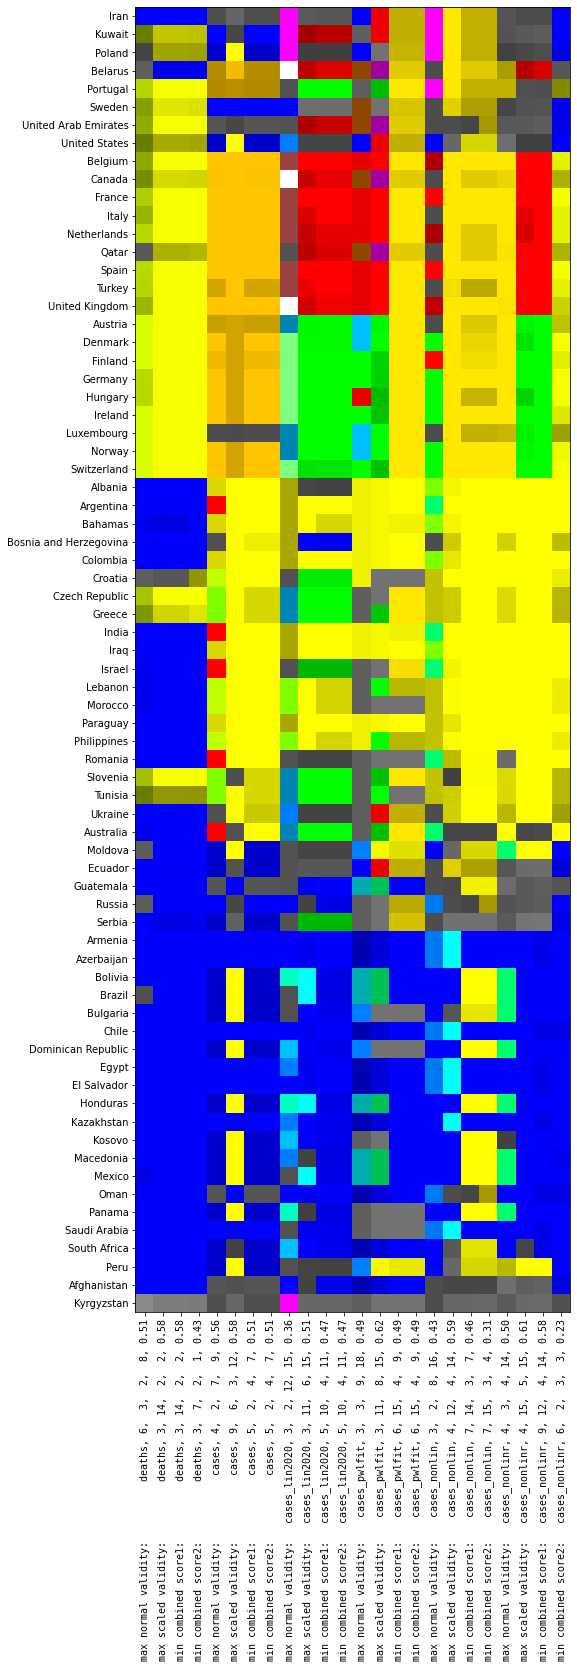

In [33]:
foo.plot_swiz()

In [36]:
foo.refclustering

22